# Triple Double Russ
   
In this post, we use webscraping to analyze Russell (Russ) Westbrook's team performance when he records a triple double. We will use multiple Python modules and focus on `BeautifulSoup`, `pandas`, `matplotlib`, and `seaborn`

## Overview
* Background
* Data Collection
* Analysis
* Data Visualization. 
* Review
* Footnotes

## Background
[Russell Westbrook](https://en.wikipedia.org/wiki/Russell_Westbrook) is a lightning rod for discussion in the NBA because of his style of play and clashes with popular players like his [beef with former teammate Kevin Durant](https://www.essentiallysports.com/nba-basketball-news-how-kevin-durant-and-russell-westbrook-went-from-close-teammates-to-having-beef-with-each-other/). Westbrook's high energy, domineering style of play is best characterized by the the statistic he is known for, the triple double.  

### What is a triple double?
Traditional NBA [box scores](https://en.wikipedia.org/wiki/Box_score) collect statistics on 5 individual player categories: points, rebounds, assists, steals, and blocks[<sup>1</sup>](#fn1). When a player has 10 or more instances of each category ("double") in 3 categories ("triple), the collective statisitcal feat is known as a triple double. Westbrook is the [NBA leader in career triple doubles](https://www.basketball-reference.com/leaders/trp_dbl_career.html) and recently [broke Hall of Famer Oscar Robertson's 47 year-old record](https://www.usatoday.com/story/sports/nba/wizards/2021/05/10/russell-westbrook-breaks-oscar-robertsons-nba-triple-double-record/5031401001/) in the 2020-21 season. Robertson was the original "Mr. Triple Double" and [some have used the moniker](https://www.foxsports.com/stories/nba/russell-westbrook-is-officially-mr-triple-double-but-his-legacy-is-complicated) with Russ. 

### What is controverisial about Russ and the triple double?

While there are many supporters of Westbrook in print and video, including [videos praising Russ](https://www.youtube.com/watch?v=Na8lIRryd-o) for his ability to create triple doubles, there is also considerable pushback of Russ' pursuit of a triple double. Check the [plays compiled in this video](https://www.youtube.com/watch?v=N8erK7T_LIQ) for instance. At the time of the compiled plays, Westbrook is 2 assists shy of a triple double and declines to take several open shots in order to pass the ball to a teammate in the hopes of getting an assist. Several plays are awkward with Westbrook putting teammates in bad positions and some plays ending in turnovers. For me, the most egregious example of a player selfishly pursuing a triple double is [Ricky Davis in 2003](https://twitter.com/TheHoopCentral/status/1169419607158841344). With seconds remaining in the game his team was winning by 25, Davis attempted a shot on his team's basket in order to secure what he hoped would be his 10th rebound and a triple double (Davis was not credited with the rebound or triple double). That Westbrook video is nothing near the cynicism of Davis, but the discussion prompted by Russ' triple double ability is: "Do Westbrook's teams win more games when he creates a triple double?"

In order to investigate Russ' team performance when he creates a triple double we need to gather his individual statistics and team performance during his games. We can gather both sources of information from [Basketball-Reference.com](https://www.basketball-reference.com/) and create a function to tabulate triple doubles. Then we will compare the win percentage of Westbrook's teams when he does and does not have a triple double to assess if his pursuit of a triple doubles negatively impacts team performance. We will subset our analysis to only Westbrook's Regular Season games

## Data Collection

In [1]:
from utils import * 
import constants as c 

Russell Westbrook's player data is available at the following link: https://www.basketball-reference.com/players/w/westbru01.html. We can use the `webbrowser` module to open this url with the code below

In [2]:
westbrook_basketball_reference_url = "https://www.basketball-reference.com/players/w/westbru01.html"
webbrowser.open(westbrook_basketball_reference_url)

True

In order to create a dataset that includes Westbrook's performance, we need to scrape game available from his yearly gamelog data. An example yearly gamelog is, https://www.basketball-reference.com/players/w/westbru01/gamelog/2022, the gamelog for this current season. To accomplish this task, we need to
* Find out how many years of game log data is available
* Create an empty list that will contain all yearly game log dataframes
* Create a list to store any errors that may come up while scraping yearly game log web pages

I've written a helper function, `get_player_metadata` that we can use to scrape a player's main [Basketball-Reference.com page](https://www.basketball-reference.com/). `get_player_metadata` returns a dictionary of the years available for the player (in the form of a list) and the player's name

In [3]:
player_metadata = get_player_metadata(westbrook_basketball_reference_url)
years_available_list = player_metadata.get("years_available")
total_years_of_data = len(years_available_list)

In [4]:
player_metadata

{'years_available': ['2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022'],
 'player_name': 'Russell Westbrook'}

* list for aggregating yearly game logs and errors while webscraping

In [5]:
westbrook_career_game_logs_df_list = []
errors_list = []

* Now we can pass the `years_available_list` and iterate through each year of game log data and extract player statistical information on the individual game basis with the function `extract_player_game_logs`. We can also get team results from the same function
    + Note: These functions collect the latest available data so you may have more games and slightly different win percentage statistics when running this notebook after 2022-03-06

In [6]:
# The url template that we pass in year info
url_template = 'https://www.basketball-reference.com/players/w/westbru01/gamelog/{year}'

# for each year of data avaialable, gather game log data
for year in years_available_list: 
    # Use try/except block to catch and inspect any urls that cause an error
    try:
        print(f'getting game log data from {year}')
        # get the formatted game log data url
        formatted_url = url_template.format(year=year)
        westbrook_yearly_game_logs = extract_player_game_logs(formatted_url)

        # append the current dataframe to the list of dataframes
        westbrook_career_game_logs_df_list.append(westbrook_yearly_game_logs)
    
    except Exception as e:
        # Store the url and the error it causes in a list
        error =[formatted_url, e] 
        # then append it to the list of errors
        errors_list.append(error)

getting game log data from 2009
getting game log data from 2010
getting game log data from 2011
getting game log data from 2012
getting game log data from 2013
getting game log data from 2014
getting game log data from 2015
getting game log data from 2016
getting game log data from 2017
getting game log data from 2018
getting game log data from 2019
getting game log data from 2020
getting game log data from 2021
getting game log data from 2022


* check if there were any errors while scraping game log web pages

In [7]:
errors_list

[]

* no errors found, we can concatenate our list of yearly game log dataframes, `westbrook_career_game_logs_df_list` into a single data frame with the concat function from the `pandas` module. 
* we can double check to see if we collected the same amount of yearly game logs as year of data available

In [8]:
print(len(westbrook_career_game_logs_df_list)==len(years_available_list))
print(len(westbrook_career_game_logs_df_list))

True
14


In [9]:
westbrook_career_game_logs_df = pd.concat(westbrook_career_game_logs_df_list, axis=0)

In [10]:
total_career_games = westbrook_career_game_logs_df.shape[0]
print(f"collected data for {total_career_games} games for {player_metadata.get('player_name')}")

collected data for 1092 games for Russell Westbrook


* let's take a look at the data set we created and the column names

In [11]:
westbrook_career_game_logs_df.head()

,player_name,basketball_ref_id,age,season,date,team,opponent,location,result,game_number,...,three_pt_attempted,three_pt_pct,steals,blocks,turnovers,plus_minus,game_score,active,margin,result_b
0,Russell Westbrook,w/westbru01,19-352,2008-09,2008-10-29,OKC,MIL,1,L (-11),1,...,2.0,0.5,0.0,1.0,2.0,+5,11.0,1,-11.0,0.0
1,Russell Westbrook,w/westbru01,19-355,2008-09,2008-11-01,OKC,HOU,0,L (-12),2,...,1.0,0.0,1.0,0.0,2.0,-19,2.8,1,-12.0,0.0
2,Russell Westbrook,w/westbru01,19-356,2008-09,2008-11-02,OKC,MIN,1,W (+3),3,...,1.0,0.0,2.0,0.0,3.0,+7,7.6,1,3.0,1.0
3,Russell Westbrook,w/westbru01,19-359,2008-09,2008-11-05,OKC,BOS,1,L (-13),4,...,5.0,0.6,1.0,0.0,2.0,-3,6.7,1,-13.0,0.0
4,Russell Westbrook,w/westbru01,19-361,2008-09,2008-11-07,OKC,UTA,0,L (-7),5,...,0.0,0.0,0.0,0.0,2.0,-5,-0.2,1,-7.0,0.0


In [12]:
westbrook_career_game_logs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 61
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   player_name         1092 non-null   object        
 1   basketball_ref_id   1092 non-null   object        
 2   age                 1092 non-null   object        
 3   season              1092 non-null   object        
 4   date                1092 non-null   datetime64[ns]
 5   team                1092 non-null   object        
 6   opponent            1092 non-null   object        
 7   location            1092 non-null   int64         
 8   result              1092 non-null   object        
 9   game_number         1092 non-null   int64         
 10  game                1092 non-null   float64       
 11  started_game        1092 non-null   float64       
 12  minutes_played      1092 non-null   object        
 13  points              1092 non-null   float64       

In [13]:
westbrook_career_game_logs_df.iloc[0]

player_name             Russell Westbrook
basketball_ref_id             w/westbru01
age                                19-352
season                            2008-09
date                  2008-10-29 00:00:00
team                                  OKC
opponent                              MIL
location                                1
result                            L (-11)
game_number                             1
game                                  1.0
started_game                          0.0
minutes_played                      21:56
points                               13.0
field_goals_made                      4.0
field_goals_att                       9.0
field_goal_pct                      0.444
free_throws_made                      4.0
free_throw_att                        6.0
free_throw_pct                      0.667
personal_fouls                        2.0
assists                               4.0
total_rebs                            4.0
offensive_rebs                    

## Analysis
* now that we have all of Westbrook's individual and team statistics, we need to 
    + create a triple double metric
    + compare win percentage across games where Westbrook does and does not generate a triple double
    
* our triple double metric, `triple_double`, is a binary indicator with a value of 1 when a triple double is achieved through one of 7 scenarios:
    + points, rebounds, and assists
    + points, rebounds, and steals
    + points, rebounds, and blocks
    + points, assists, and steals
    + points, assists, and blocks
    + rebounds, assists, and blocks
    + rebounds, assists, and steals

In [14]:
def triple_double(row):
    if row['points']>=10 and row['total_rebs']>=10 and row['assists']>=10:
        return 1
    if row['points']>=10 and row['total_rebs']>=10 and row['blocks']>=10:
        return 1
    if row['points']>=10 and row['total_rebs']>=10 and row['steals']>=10:
        return 1
    if row['points']>=10 and row['assists']>=10 and row['steals']>=10:
        return 1
    if row['points']>=10 and row['assists']>=10 and row['blocks']>=10:
        return 1
    if row['total_rebs']>=10 and row['assists']>=10 and row['blocks']>=10:
        return 1
    if row['total_rebs']>=10 and row['assists']>=10 and row['steals']>=10:
        return 1

In [15]:
westbrook_career_game_logs_df["triple_double"] = westbrook_career_game_logs_df.apply(triple_double, axis=1)
westbrook_career_game_logs_df.loc[:, "triple_double"] = westbrook_career_game_logs_df.loc[:, "triple_double"].fillna(0)
westbrook_career_game_logs_df["triple_double"].astype(int)

0     0
1     0
2     0
3     0
4     0
     ..
57    0
58    0
59    0
60    0
61    0
Name: triple_double, Length: 1092, dtype: int64

* percentage of games westbrook records a triple double and number of games he has recorded a triple double

In [16]:
np.mean(westbrook_career_game_logs_df["triple_double"])

0.17673992673992675

In [17]:
westbrook_career_game_logs_df.shape[0]*np.mean(westbrook_career_game_logs_df["triple_double"])

193.0

* I calculated 193 triple doubles for Westbrook (17% of his career games) which matches the count found here on basketball-reference.com: https://www.basketball-reference.com/leaders/trp_dbl_career.html
    + Note these numbers are current as of 2022-03-06
* now we can calculate win percentage for games where Westbrook did and did not have a triple double
* let's isolate only games westbrook was active for
    + players can miss games for injury, personal reasons, suspension, and more
* separate triple double games from other games

### Win Percentage by Triple Double Occurrence

* Active games only

In [18]:
westbrook_active_games_pct = np.mean(westbrook_career_game_logs_df["active"])*100
print(f"Russell Westbrook has been active for {westbrook_active_games_pct:.2f}% of his teams' games")

Russell Westbrook has been active for 91.94% of his teams' games


* Westbrook is defined by his regular availability for his team (playing in 92% of his teams' games), he is so remarkably durable that he once had a [10 year streak](https://thesportsrush.com/nba-news-russell-westbrook-is-a-true-ironman-wizards-star-has-a-whopping-availability-record-that-met-an-unceremonious-end/) of no missed games

In [19]:
westbrook_active_games_df = westbrook_career_game_logs_df.loc[westbrook_career_game_logs_df["active"]==1]
triple_double_games_df = westbrook_active_games_df.loc[westbrook_active_games_df["triple_double"]==1]
non_triple_double_games_df = westbrook_active_games_df.loc[westbrook_active_games_df["triple_double"]!=1]

In [20]:
westbrook_active_games_pct = np.mean(westbrook_career_game_logs_df["active"])*100
westbrook_career_games = westbrook_career_game_logs_df.shape[0]
westbrook_active_games = westbrook_active_games_df.shape[0]
triple_double_games = triple_double_games_df.shape[0]
non_triple_double_games = non_triple_double_games_df.shape[0]
active_triple_double_pct = np.mean(westbrook_active_games_df["triple_double"])*100

In [21]:
print(f"Russell Westbrook has been active for {westbrook_active_games_pct:.2f}% of his teams' games")
print(f"He has played in {westbrook_active_games} of {westbrook_career_games} potential games")
print(f"Westbrook has recorded a triple double in {triple_double_games} games, {active_triple_double_pct:.2f}% of his active games")
print(f"Westbrook has {non_triple_double_games} games without a triple double")

Russell Westbrook has been active for 91.94% of his teams' games
He has played in 1004 of 1092 potential games
Westbrook has recorded a triple double in 193 games, 19.22% of his active games
Westbrook has 811 games without a triple double


To complete our comparison, we need Westbrook's win percentage in 4 scenarios
* Westbrook's career win percentage
* Westbrook's active win percentage
* Westbrook's triple double games win percentage
* Westbrook's non-triple double games win percentage

We can use the `result_b` column, a binary indicator of results where 0 indicates a loss and 1 indicates a win to calculate these win percentages across our different data frames. The mean for `result_b` is percentage (after multiplying by 100) of games won under the various scenario

* First, Westbrook's career win percentage for his teams regardless of his activity status

In [22]:
westbrook_career_win_pct = np.mean(westbrook_career_game_logs_df['result_b'])*100
print(f"Russell Westbrook's teams have won {westbrook_career_win_pct:.2f}% of their games")

Russell Westbrook's teams have won 54.40% of their games


* Now scenario 2, win percentage when Russ is active

In [23]:
westbrook_active_win_pct = np.mean(westbrook_active_games_df['result_b'])*100
print(f"Russell Westbrook's teams have win {westbrook_active_win_pct:.2f}% of their games when he is active")

Russell Westbrook's teams have win 59.16% of their games when he is active


* We can see that Westbrook's teams win 5% more games when he is active than when he doesn't play, a good sign for an impactful palyer
* Now let's calculate Westbrook's team win percentage in games he has a triple double

In [24]:
triple_double_win_pct = np.mean(triple_double_games_df['result_b'])*100
print(f"Russell Westbrook's teams have win {triple_double_win_pct:.2f}% of their games when he records a triple double")

Russell Westbrook's teams have win 73.58% of their games when he records a triple double


* Lastly, let's calculate Westbrook's win percentage when he does not record a triple double

In [25]:
non_triple_double_win_pct = np.mean(non_triple_double_games_df['result_b'])*100
print(f"Russell Westbrook's teams have win {non_triple_double_win_pct:.2f}% of their games when he DOES NOT record a triple double")

Russell Westbrook's teams have win 55.73% of their games when he DOES NOT record a triple double


In [26]:
import tabulate
data = [["Career Win Pct", f"{westbrook_career_win_pct:.2f}%"],
         ["Active Win Pct", f"{westbrook_active_win_pct:.2f}%"],
         ["Triple Double Win Pct", f"{triple_double_win_pct:.2f}%"],
         ["Non-Triple Double Win Pct", f"{non_triple_double_win_pct:.2f}%"]]
table = tabulate.tabulate(data, tablefmt='html')
table

Career Win Pct,54.40%
Active Win Pct,59.16%
Triple Double Win Pct,73.58%
Non-Triple Double Win Pct,55.73%


* We can add a z-test of proportions to compare the win percentages in different scenarios to see if they are stastically significant

In [27]:
contingency_table = pd.crosstab(westbrook_active_games_df.result_b,westbrook_active_games_df.triple_double) #Contingency Table
contingency_table

triple_double,0.0,1.0
result_b,,
0.0,359,51
1.0,452,142


In [28]:
z_stat, p_value = create_proportions_ztest(contingency_table)

z_stat: -4.532, p_value: 0.000
Reject the null hypothesis - suggest the alternative hypothesis is true


* The difference in win percentage for games with a triple double and without a triple double is statistically significant

## Data visualization
* Chart of triple doubles over time
* Where is Russ having triple doubles: home or away?
    + Note these counts are across the NBA season and not calendar year

In [29]:
westbrook_active_games_df = copy.deepcopy(westbrook_active_games_df)
westbrook_active_games_df["year"] = westbrook_active_games_df["season"].apply(lambda x: x[0:4])
westbrook_active_games_df["year"] =  pd.DatetimeIndex(westbrook_active_games_df["year"])

In [30]:
yearly_triple_double_counts = westbrook_active_games_df.resample(rule='Y', on='year')['triple_double'].sum()
yearly_triple_double_counts

year
2008-12-31     1.0
2009-12-31     1.0
2010-12-31     3.0
2011-12-31     0.0
2012-12-31     1.0
2013-12-31     2.0
2014-12-31    11.0
2015-12-31    18.0
2016-12-31    42.0
2017-12-31    25.0
2018-12-31    34.0
2019-12-31     8.0
2020-12-31    38.0
2021-12-31     9.0
Freq: A-DEC, Name: triple_double, dtype: float64

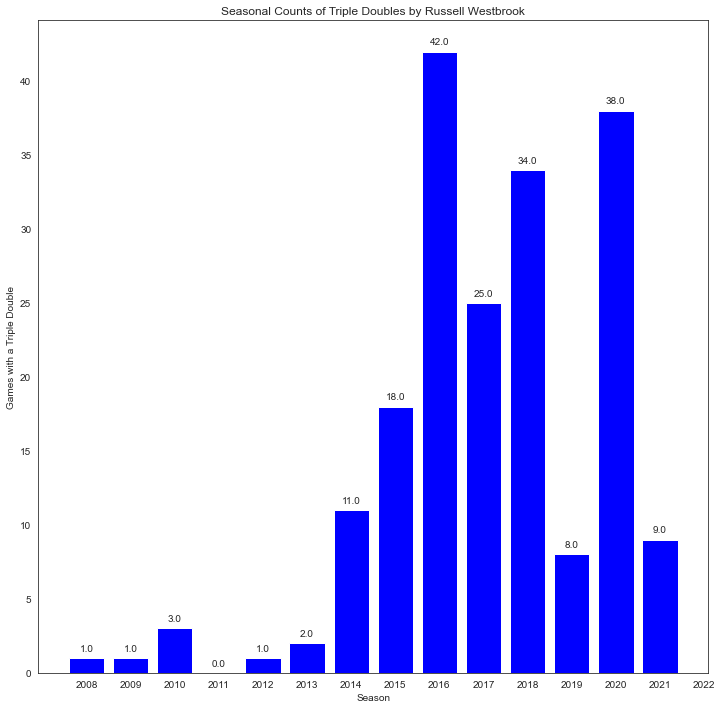

In [31]:
sns.set_style("white")
sns.set_color_codes()
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(yearly_triple_double_counts.index.year,
       yearly_triple_double_counts.values,
       color='Blue')

# Set title and labels for axes
ax.set(xlabel="Season",
       ylabel="Games with a Triple Double",
       title= "Seasonal Counts of Triple Doubles by Russell Westbrook")

# add '2008' to years available list so that we have the Seasons shown on x-axis 
years_available_list = ['2008'] + years_available_list
ax.xaxis.set_ticks([int(year) for year in years_available_list]) 
# Call add values function 
add_value_labels(ax)
plt.show()

* to find the frequency of triple doubles by location (home vs away), we need to
    + create a `year` variable from the `date` variable
    + group by three variables of interest and fill the observations without a triple double with 0 instead of NaN

In [32]:
# westbrook_active_games_df = copy.deepcopy(westbrook_active_games_df)
# westbrook_active_games_df["year"] =  pd.DatetimeIndex(westbrook_active_games_df["date"]).year

In [33]:
triple_double_games_df = copy.deepcopy(triple_double_games_df)
triple_double_games_df["year"] = triple_double_games_df["season"].apply(lambda x: x[0:4])
triple_double_games_df["year"] =  pd.DatetimeIndex(triple_double_games_df["year"]).year

In [34]:
triple_double_games_gb_df = triple_double_games_df.groupby(['triple_double', 'location', 'year']).size().unstack(level=2).fillna(0).T
triple_double_games_gb_df

triple_double   1.0      
location          0     1
year                     
2008            0.0   1.0
2009            1.0   0.0
2010            0.0   3.0
2012            1.0   0.0
2013            1.0   1.0
2014            2.0   9.0
2015            7.0  11.0
2016           17.0  25.0
2017           16.0   9.0
2018           15.0  19.0
2019            3.0   5.0
2020           17.0  21.0
2021            4.0   5.0

* optional bar plot of triple doubles by game location

In [35]:
# triple_double_games_gb_df.plot(kind = 'bar')

* line plot of triple doubles over time by location

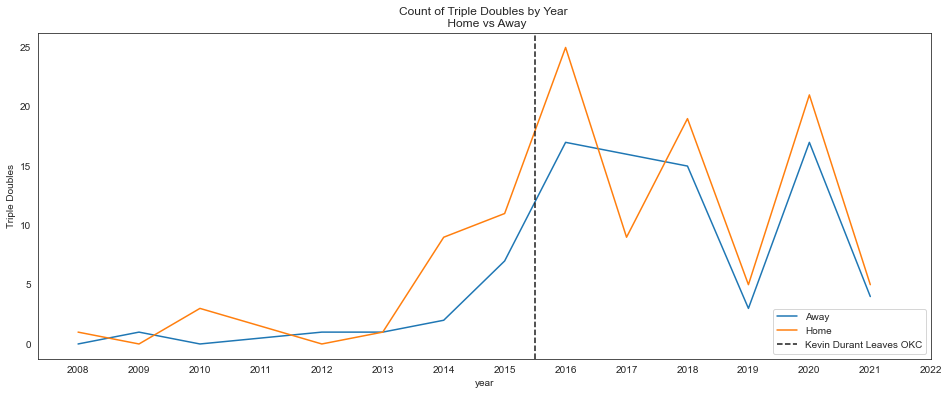

In [36]:
sns.set_style("white")
sns.set_color_codes()
fig, ax = plt.subplots(figsize=(16, 6))
fig.subplots_adjust(hspace=0.4)
triple_double_games_gb_df.iloc[:,].plot(ax=ax, title='Count of Triple Doubles by Year \n Home vs Away',
                                        ylabel = "Triple Doubles")
plt.axvline(x=2015.5, color='k', linestyle='--')
plt.xticks([int(year) for year in years_available_list])
plt.legend(["Away", "Home", "Kevin Durant Leaves OKC"], loc ="lower right")
plt.show()

* Russell Westbrook has generated more triple doubles since Kevin Durant left the Oklahoma City Thunder
* Let's count this triple doubles created while teammates with Kevin Durant and after no longer being teammates
    + Note: Westbrook is an older player and more established in seasons post playing with Durant and it will not be surprising if he records more triple doubles as a tenured player than as a younger player

In [37]:
triple_double_games_gb_df2 = triple_double_games_gb_df[1].reset_index(level="year")
triple_double_games_gb_df2.keys().name = ''
triple_double_games_gb_df2.rename(columns={0:"Away", 1:"Home"}, inplace=True)
triple_double_games_gb_df2

,year,Away,Home
0,2008,0.0,1.0
1,2009,1.0,0.0
2,2010,0.0,3.0
3,2012,1.0,0.0
4,2013,1.0,1.0
5,2014,2.0,9.0
6,2015,7.0,11.0
7,2016,17.0,25.0
8,2017,16.0,9.0
9,2018,15.0,19.0


In [38]:
with_kd_mask = triple_double_games_gb_df2["year"]<2016
without_kd_mask = triple_double_games_gb_df2["year"]>=2016

In [39]:
triple_double_games_gb_df2.loc[without_kd_mask]

,year,Away,Home
7,2016,17.0,25.0
8,2017,16.0,9.0
9,2018,15.0,19.0
10,2019,3.0,5.0
11,2020,17.0,21.0
12,2021,4.0,5.0


In [40]:
# triple_double_games_gb_df2.loc[with_kd_mask]

* count triple doubles with and without Kevin Durant as a teammate

In [41]:
triple_doubles_without_kd = sum(triple_double_games_gb_df2.loc[without_kd_mask]["Away"])+ sum(triple_double_games_gb_df2.loc[without_kd_mask]["Home"])
triple_doubles_with_kd = sum(triple_double_games_gb_df2.loc[with_kd_mask]["Away"])+ sum(triple_double_games_gb_df2.loc[with_kd_mask]["Home"])

In [42]:
print(f"Westbrook recorded {triple_doubles_with_kd} triple doubles in {triple_double_games_gb_df2.loc[with_kd_mask].shape[0]} seasons with Kevin Durant as a teammate")
print(f"Westbrook recorded {triple_doubles_without_kd} triple doubles in {triple_double_games_gb_df2.loc[without_kd_mask].shape[0]}+ seasons with Kevin Durant as a teammate")

Westbrook recorded 37.0 triple doubles in 7 seasons with Kevin Durant as a teammate
Westbrook recorded 156.0 triple doubles in 6+ seasons with Kevin Durant as a teammate



### Game margin by Triple Double Occurrence

* what is the margin difference in games that are lost, but a triple double is recorded?
* compare to margin for games lost without a triple double


In [43]:
triple_double_win_margin = np.mean(triple_double_games_df.loc[triple_double_games_df["result_b"]==1]["margin"])
triple_double_loss_margin = np.mean(triple_double_games_df.loc[triple_double_games_df["result_b"]==0]["margin"])
non_triple_double_win_margin = np.mean(non_triple_double_games_df.loc[non_triple_double_games_df["result_b"]==1]["margin"])
non_triple_double_loss_margin = np.mean(non_triple_double_games_df.loc[non_triple_double_games_df["result_b"]==0]["margin"])

In [44]:
margin_data = [["Triple Double Win Margin", f"{triple_double_win_margin:.2f}"],
               ["Non-Triple Double Win Margin", f"{non_triple_double_win_margin:.2f}"],
               ["Triple Double Loss Margin", f"{triple_double_loss_margin:.2f}"],
               ["Non-Triple Double Loss Margin", f"{non_triple_double_loss_margin:.2f}"]]
margin_table = tabulate.tabulate(margin_data, tablefmt='html')
margin_table

Triple Double Win Margin,11.55
Non-Triple Double Win Margin,11.6
Triple Double Loss Margin,-7.27
Non-Triple Double Loss Margin,-9.96


* When Russ's teams lose, they (on average) lose by a smaller margin (-7.27) when he records a triple double than when he does not (-9.96)
* Unlike the margin in losses, the win margin is nearly identical in games Russ' teams win when Russ records a triple double (11.55) than when he does not (11.6)

## Review

In all honesty, these results are surprising (to me) and speak well for Russ and his supporters

* Westbrook's teams win a far greater percentage of games when he has a triple double than when he doesn't
    + 74% of games won when a triple double is recorded vs 55% of games won without a triple double
* Game margins that Westbrook's teams lose when he records a triple double are smaller than game margins when a triple double is not recorded in a loss
    + Suggests that Russ is not pursuing triple doubles in blowouts
* Westbrook recently became a triple double machine, amassing 156 of his 193 triple doubles in the last 6+ seasons alone alone
    + For reference, LeBron James has recorded 103 total triple doubles in a 19-year NBA career
    + Westbrook's increased pursuit of the triple double occurs after the Oklahoma City Thunder lost Kevin Durant during Free Agency in the summer of 2016

## Footnotes

[<sup id="fn1">1</sup>](#fn1-back)steals and blocks were added to the box score almost a decade after points, rebounds, and assists. [This blazersedge.com article](https://www.blazersedge.com/2017/1/19/13755264/nba-box-score-history) has excellent documentation of the NBA box score's evolution 

In [45]:
import sys
import IPython
import matplotlib as mpl
from datetime import datetime
print('originally published 2022-03-06 11:43')
print(f'last updated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")} \n')
print(f'Python version: {sys.version_info}')
print(f'matplotlib version: {mpl.__version__}')
print(f'iPython version: {IPython.__version__}')
print(f'urllib version: {urllib.request.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'pandas version: {pd.__version__}')

originally published 2022-03-06 11:43
last updated: 2022-03-05 19:05:58 

Python version: sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib version: 3.4.3
iPython version: 7.29.0
urllib version: 3.9
seaborn version: 0.11.2
pandas version: 1.4.1
